# Technical Report

1. First, I established data types for each field in each dataset.
2. I distinguished primary keys and foreign keys and mapped out relationships among different tables using [this ERD tool](https://app.quickdatabasediagrams.com/#/).
3. I exported the ERD into a PostgreSQL format. 
4. I built a schema for importing csv files in accordance with the exported ERD.

# Bonus

In [1]:
# Import SQL Alchemy and dependencies
from sqlalchemy import create_engine
from db_pw import db_pw
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Create a connection to a SQLite database
engine = create_engine(f'postgresql://{db_pw}localhost:5432/employees')
conn = engine.connect()

In [3]:
# Querying and merging
salaries = pd.read_sql('SELECT * FROM salaries', conn)
titles = pd.read_sql('SELECT * FROM titles', conn)
m = pd.merge(salaries, titles, on = 'emp_no')[['title', 'salary']]

In [4]:
# Calculating average salary by title
avg = m.groupby('title').mean().round(2)
avg

,salary
title,
Assistant Engineer,48493.20
Engineer,48539.78
Manager,51531.04
Senior Engineer,48506.75
Senior Staff,58503.29
Staff,58465.27
Technique Leader,48580.51


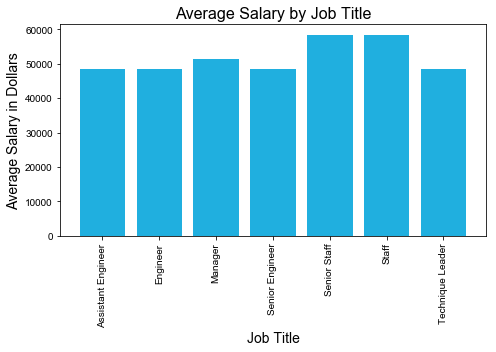

In [5]:
# Plotting the average salary by job title ..and practicing seaborn
fig, ax = plt.subplots(figsize = (7, 5))

sns.barplot(x = avg.index, y = avg['salary'], color = 'deepskyblue')
sns.set_style('dark')

plt.xticks(rotation = 90)

plt.xlim(-0.75, len(avg.index) - 0.25)

plt.title('Average Salary by Job Title', fontsize = 16)
plt.xlabel('Job Title', fontsize = 14)
plt.ylabel('Average Salary in Dollars', fontsize = 14)

plt.tight_layout()
plt.savefig('avg_salary.png')
plt.show()

# Epilogue

In [6]:
# WHO KNEW?
ep = pd.read_sql('SELECT * FROM emp WHERE emp_no = 499942', conn)
ep

,emp_no,birth_date,first_name,last_name,gender,hire_date
0,499942,1963-01-10,April,Foolsday,F,1997-02-10
